In [1]:
import qdmpy
import qdmpy.pl
import qdmpy.plot
import qdmpy.field
import qdmpy.source

import matplotlib
import numpy as np

from qdmpy.shared.polygon import polygon_selector

In [2]:
exec(open("../TEST_DATA_PATH.py").read())

In [3]:
options_dict = {
    "base_dir": TEST_DATA_PATH, # var is read from TEST_DATA_PATH.py
    "filepath": "mz_test/ODMR - Pulsed_10",
    "custom_output_dir_suffix": "_polytest_{ROI}_bin_{total_bin}",
    
    "additional_bins": 4,
    
    "exp_reference_type": "field",
    "plot_bnv_flip_with_bias_mag": False,
    "fourier_pad_mode": "mean",
    "fourier_do_hanning_filter": False,
    "zero_point_normalisation_region": [[0, 0], [20, 20]],
    
    "polygon_nodes_path": None, # TEST_DATA_PATH + "mz_test/polys.json",
    "annotate_polygons": False, # True,
    
    "system_name": "Cryo_Widefield",

    "ROI": "Rectangle", 
    "ROI_start": [65, 65],
    "ROI_end": [190,190],
    
    "AOI_1_start": [30, 40],
    "AOI_1_end": [40, 45], 
    "AOI_2_start": [20, 20],
    "AOI_2_end": [24, 24], 
    "AOI_3_start": [30, 20],
    "AOI_3_end": [32, 24], 
    "single_pixel_check": [90, 150],
    
    "fit_backend": "scipyfit",
    "fit_backend_comparison": ["scipyfit"],
    "fit_pl_pixels": True, 
    "force_fit": False, 
    
    "use_ROI_avg_fit_res_for_all_pixels": True,
    
    "scipyfit_sub_threads": 2, 

    "fit_functions":  {"linear": 1, "lorentzian": 2},

    "pos_guess": [2730, 3020],
    "pos_range": 25,

    "amp_guess": -0.015,
    "amp_bounds": [-0.300, -0.00003],
    
    "save_fig_type": "pdf",
    
    "freqs_to_use": [1, 0, 0, 0, 0, 0, 0, 1],
    "diamond_ori": "<100>_<100>", # HPHT
        
    "auto_read_bias": True,
#     "bias_mag": 50,
#     "bias_theta": 45,
#     "bias_phi": 125, # 45
    
    "calc_field_pixels": True,
    "force_field_calc": True,

    "bfield_bground_method": "poly",
    "bfield_bground_params": {
        "order": 1
    },
    "bnv_bground_method": "poly",
    "bnv_bground_params": {
        "order": 1
    },
    
    "source_bground_method": None,
    "source_bground_params": {
        "order": 2
    },
    "standoff": 50e-9, #100e-9,
    "nv_layer_thickness": 10e-9,
    "NVs_above_sample": True,
    
    
    "colormap_range_dicts": {
        "bnv_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "bfield_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "magnetization_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "residual_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "sigma_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "param_images": {
            "type": "percentile",
            "values": [2, 98]
        },
        "dshift_images": {
            "type": "percentile",
            "values": [2, 98]
        },
    }
}
# if you want to use a reference experiment {ensure you run this even if 'None' as it sets up output dirs etc.}
ref_options_dir = None

In [4]:
options, ref_options = qdmpy.initialize(
    options_dict=options_dict,
    ref_options_dir=ref_options_dir,
    set_mpl_rcparams=True
)

/home/samsc/src/qs/qdmpy_proj/qdmpy_git/src/qdmpy/shared/misc.py:17: QDMPYWarning: Continuing without reference. (No reference chosen or exp_referece_type was 'None')
  warnings.warn(msg, QDMPYWarning)


/home/samsc/src/qs/qdmpy_proj/qdmpy_git/src/qdmpy/shared/misc.py:17: QDMPYWarning: Avoiding IndexError for single_pixel_check (setting pixel check to centre of image):
index 150 is out of bounds for axis 1 with size 126
  warnings.warn(msg, QDMPYWarning)


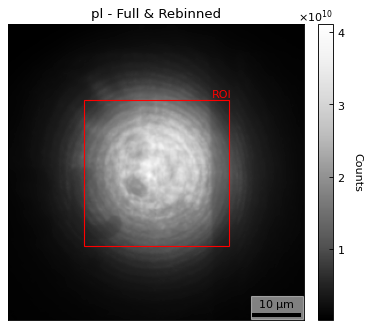

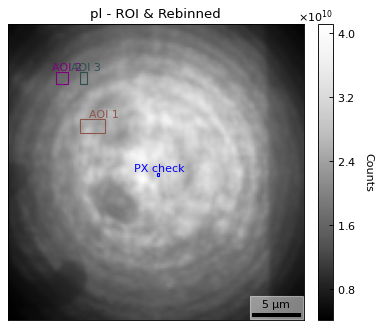

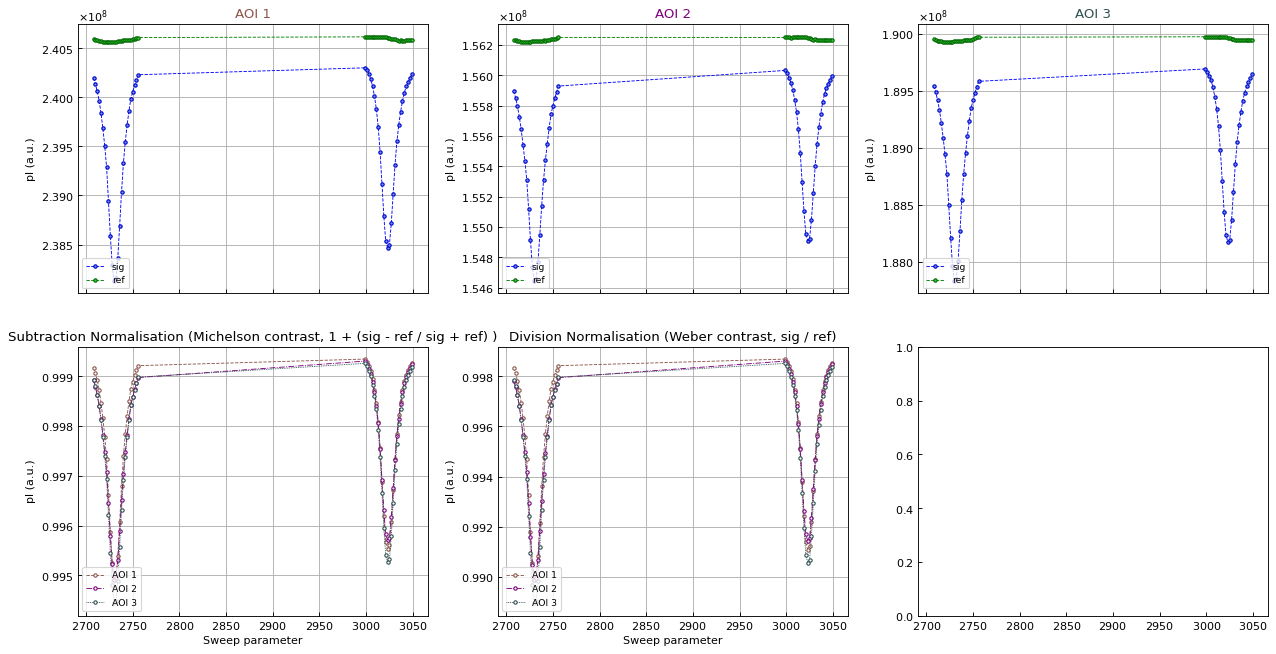

In [5]:
image, prelim_sweep_list = qdmpy.pl.load_image_and_sweep(options)
PL_image, PL_image_ROI, sig, ref, sig_norm, single_pixel_pl, sweep_list, ROI = qdmpy.pl.reshape_dataset(
        options, image, prelim_sweep_list
    )
ROI_PL_fig = qdmpy.plot.roi_pl_image(options, PL_image)

AOI_PL_fig = qdmpy.plot.aoi_pl_image(options, PL_image_ROI)

AOI_spectra_fig = qdmpy.plot.aoi_spectra(options, sig, ref, sweep_list)

qdmpy.pl.save_pl_data(options, PL_image, PL_image_ROI)

In [6]:
matplotlib.pyplot.show()

/home/samsc/src/qs/qdmpy_proj/qdmpy_git/src/qdmpy/pl/scipyfit.py:35: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm  # auto detects jupyter


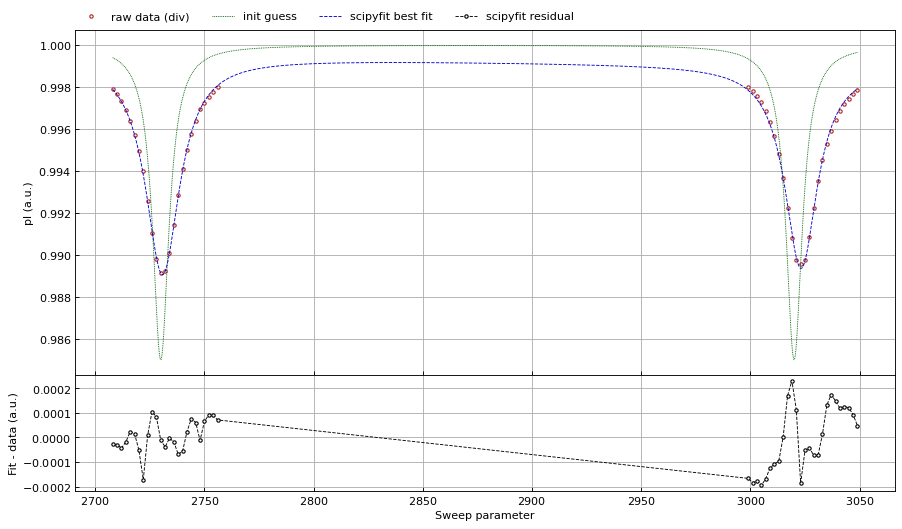

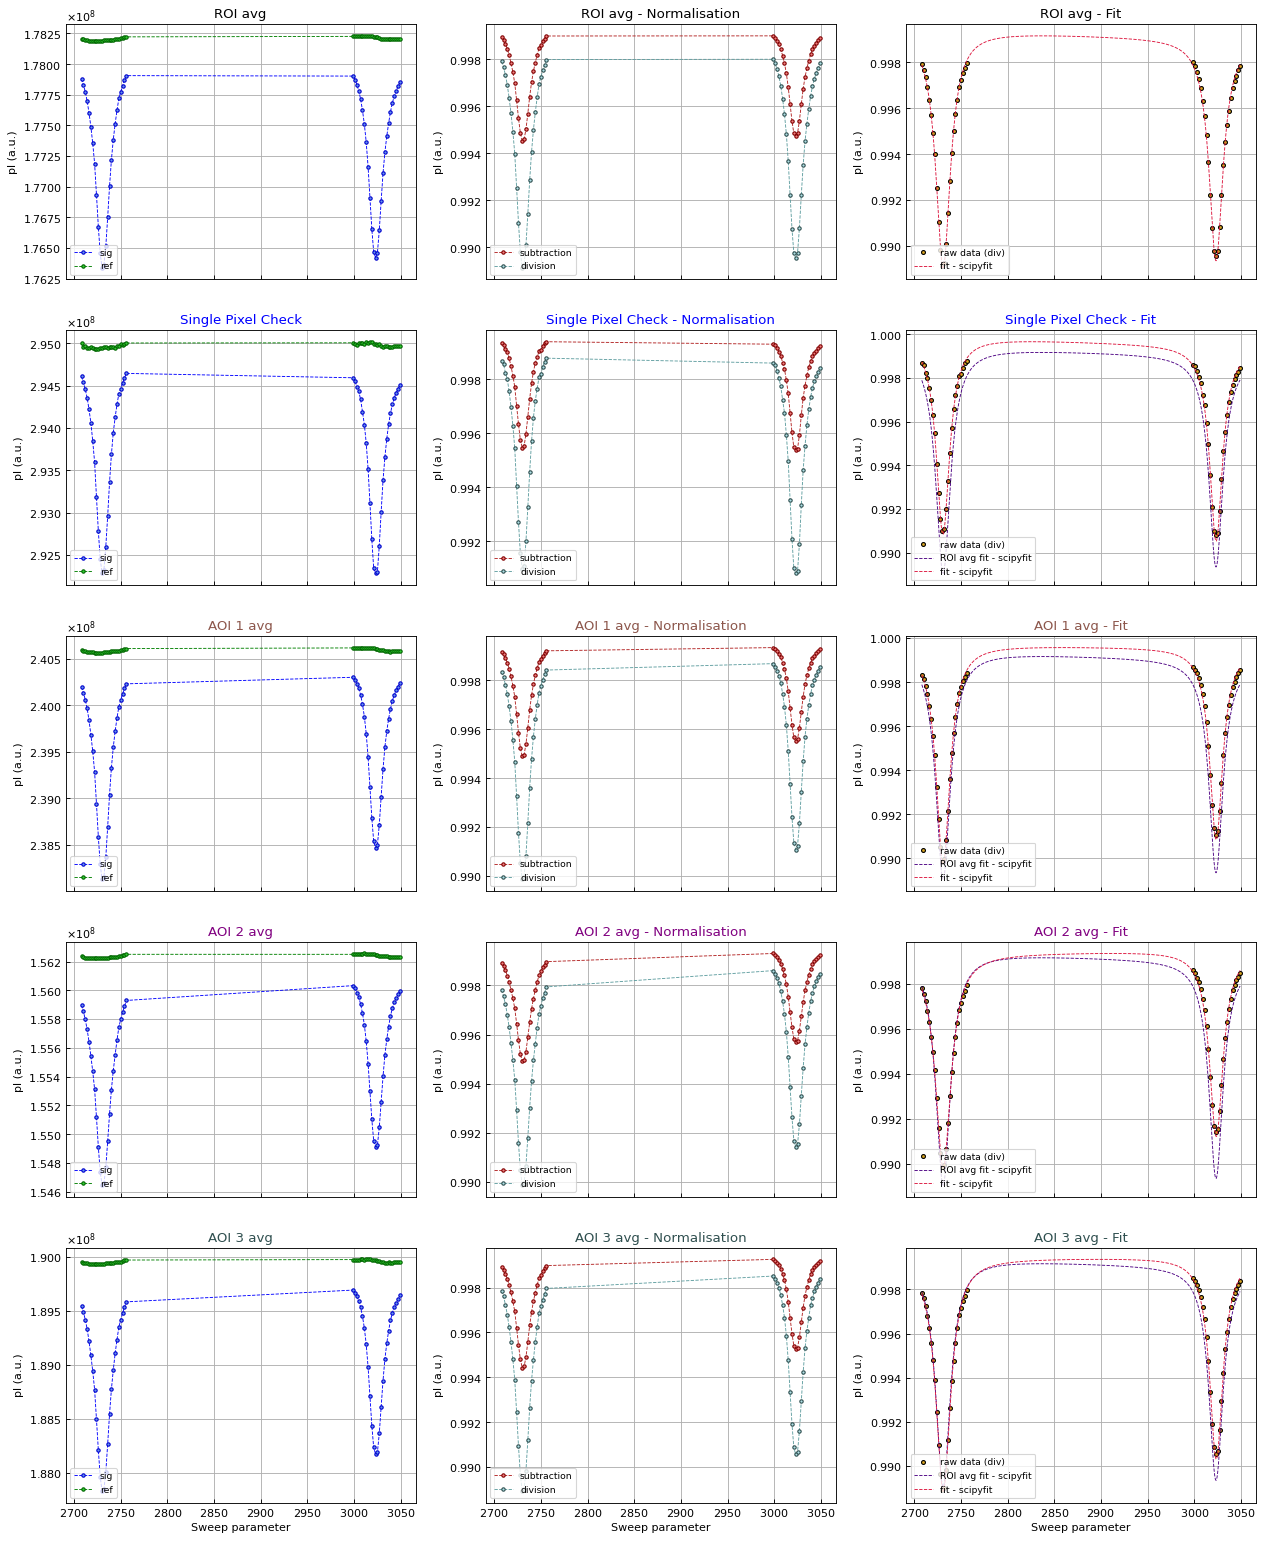

In [7]:
fit_model = qdmpy.pl.define_fit_model(options)
backend_ROI_results_lst = qdmpy.pl.fit_roi_avg_pl(options, sig, ref, sweep_list, fit_model)
ROI_fit_fig = qdmpy.plot.roi_avg_fits(options, backend_ROI_results_lst)

fit_result_collection_lst = qdmpy.pl.fit_aois_pl(options, sig, ref, single_pixel_pl, sweep_list, fit_model, backend_ROI_results_lst)
AOI_fit_fig = qdmpy.plot.aoi_spectra_fit(options, sig, ref, sweep_list, fit_result_collection_lst, fit_model)

In [8]:
wanted_roi_result = next(
    filter(
        lambda result: result.fit_backend == options["fit_backend"], backend_ROI_results_lst
    )
) # ROI fit result for chosen fit backend
pixel_fit_params, sigmas = qdmpy.pl.get_pl_fit_result(options, sig_norm, sweep_list, fit_model, wanted_roi_result)

qdmpy.pl.save_pl_fit_results(options, pixel_fit_params)
qdmpy.pl.save_pl_fit_sigmas(options, sigmas)

/home/samsc/src/qs/qdmpy_proj/qdmpy_git/src/qdmpy/shared/misc.py:17: QDMPYWarning: Using previous fit results.
  warnings.warn(msg, QDMPYWarning)


In [9]:
ref_fit_params, ref_sigmas = qdmpy.pl.load_ref_exp_pl_fit_results(ref_options)

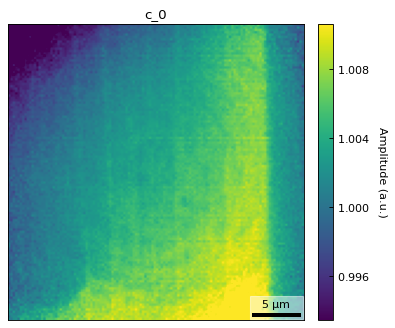

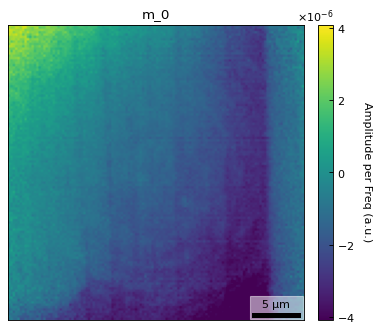

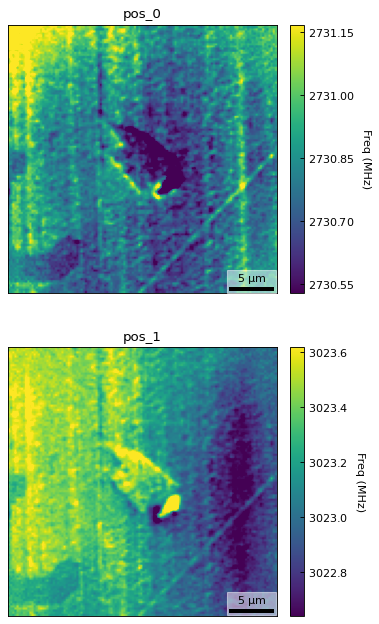

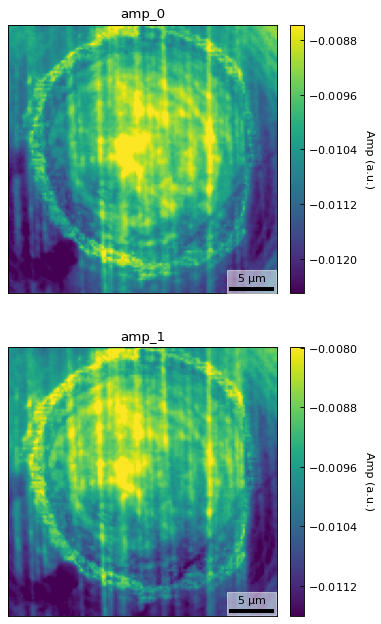

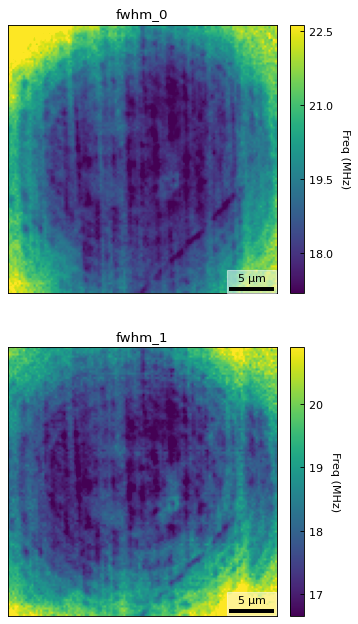

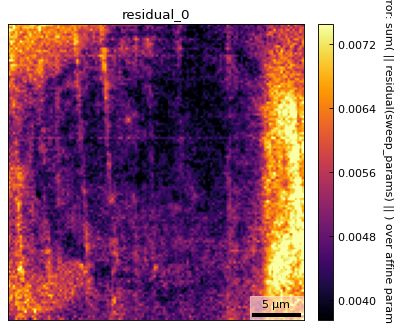

In [10]:
c_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "c")
m_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "m")
pos_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "pos")
amp_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "amp")
fwhm_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "fwhm")
residual_fig = qdmpy.plot.pl_param_images(options, fit_model, pixel_fit_params, "residual")

In [11]:
field_res = qdmpy.field.odmr_field_retrieval(options, pixel_fit_params, ref_fit_params)
(sig_bnvs, ref_bnvs, bnvs), (sig_dshifts, ref_dshifts), (sig_params, ref_params, field_params), (sig_field_sigmas, ref_field_sigmas, field_sigmas) = field_res
qdmpy.field.save_field_calcs(options, *field_res)

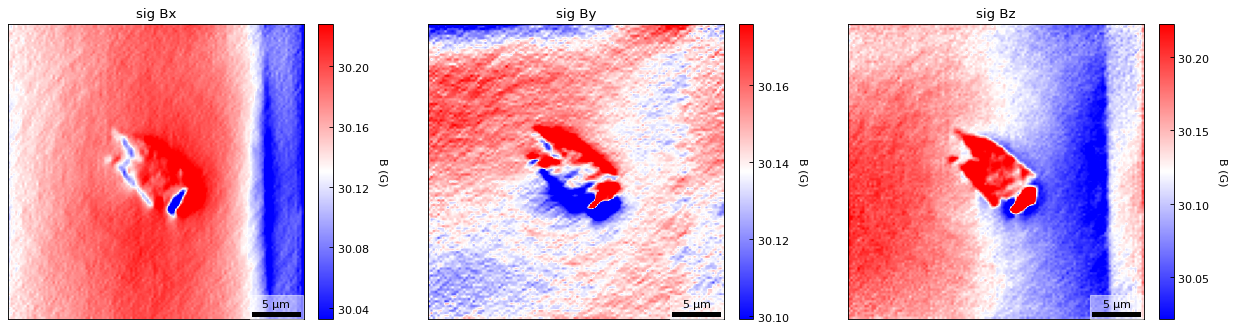

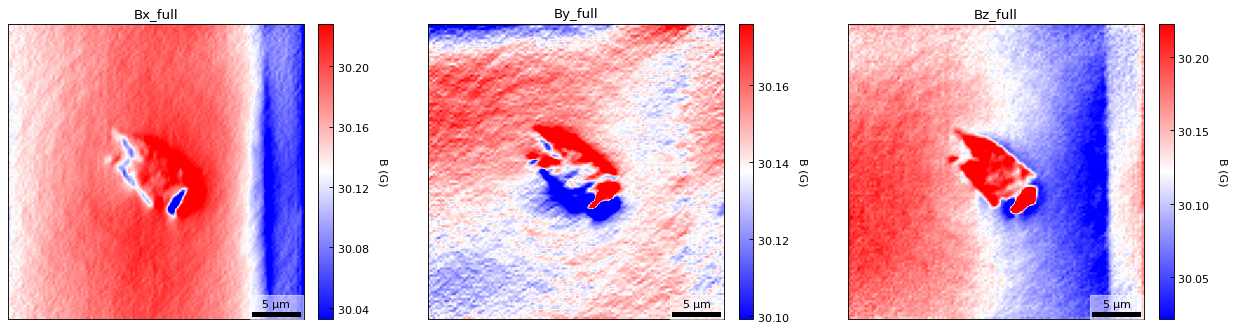

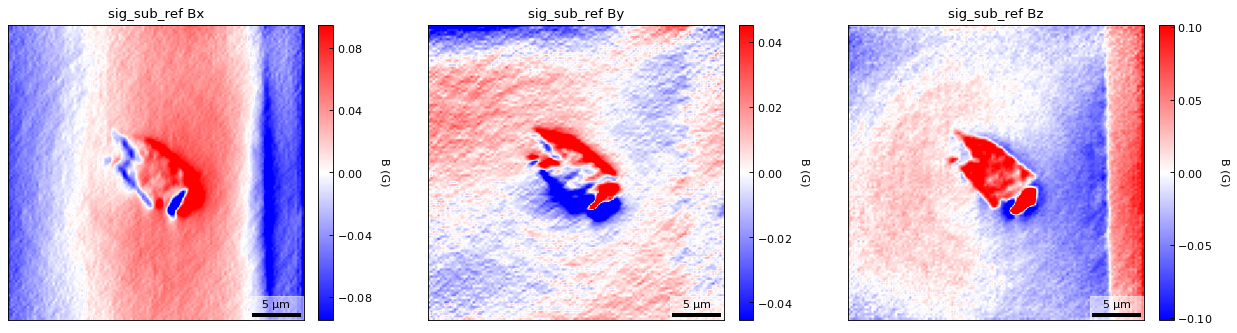

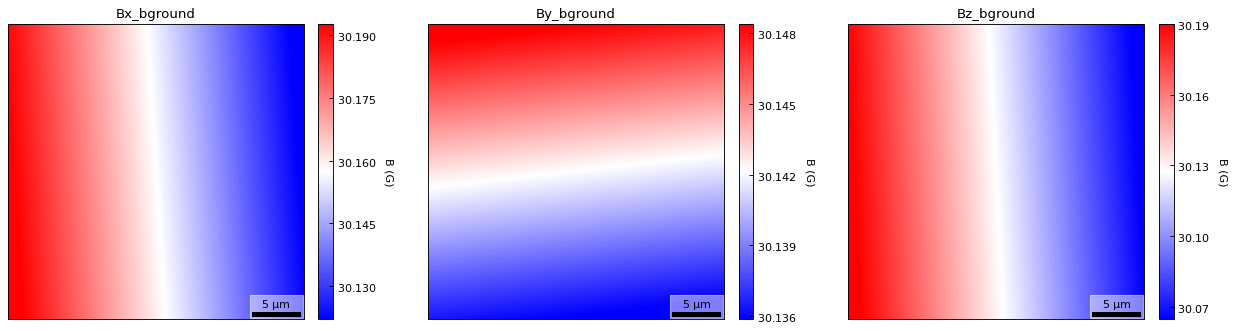

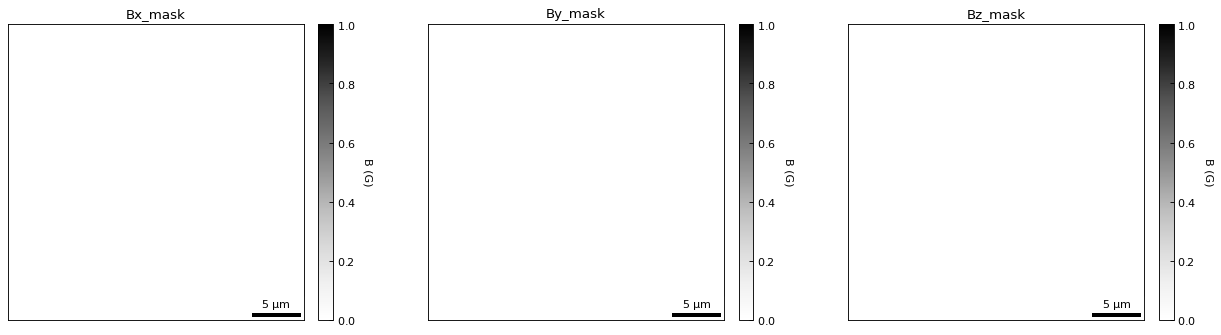

In [12]:
bfield_sig_plot = qdmpy.plot.bfield(options, "sig", sig_params)
bfield_ref_plot = qdmpy.plot.bfield(options, "ref", ref_params)
no_bsub_plot = qdmpy.plot.bfield(options, "full", field_params)
bfield_plot = qdmpy.plot.bfield(options, "sig_sub_ref", field_params)
bfield_bground_plot = qdmpy.plot.bfield(options, "bground", field_params)
bfield_bground_plot = qdmpy.plot.bfield(options, "mask", field_params)

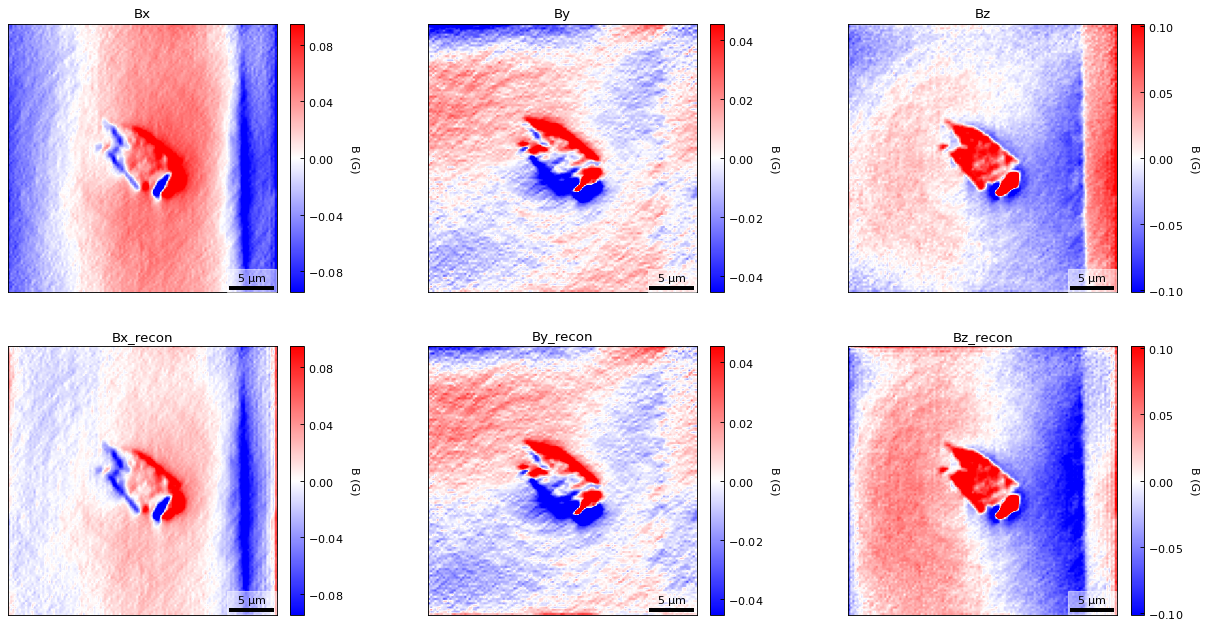

In [13]:
bconsist_plot = qdmpy.plot.bfield_consistency(options, "sig_sub_ref", field_params)

In [14]:
source_params = qdmpy.source.odmr_source_retrieval(options, bnvs, field_params)
qdmpy.source.save_source_params(options, source_params)

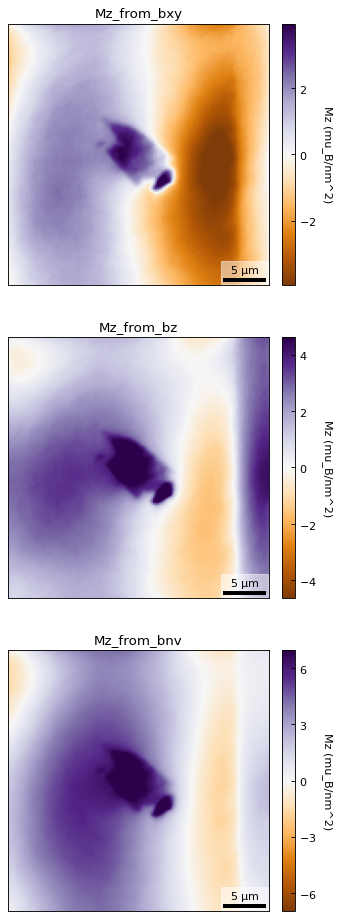

In [15]:
mag_plot = qdmpy.plot.magnetization(options, source_params, plot_bgrounds=True)

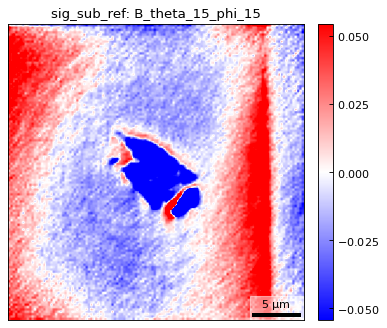

In [16]:
qdmpy.field.add_bfield_proj_bias(options, field_params)
btp_plot = qdmpy.plot.bfield_theta_phi(options, "sig_sub_ref", field_params)

In [17]:
qdmpy.save_options(options)
# import qdmpy.shared.json2dict; print(qdmpy.shared.json2dict.dict_to_json_str(options))

In [33]:
%matplotlib qt
numpy_txt_file_path = options["field_sig_sub_ref_dir"] / "sig_sub_ref_bnv_0.txt"

json_input_path = None # "polys.json"
json_output_path = "polys.json"

mean_plus_minus = 0.5

# NOTE comment this out when you're happy with the polygon selection
pgon_lst = polygon_selector(
    numpy_txt_file_path,
    json_output_path=json_output_path,
    json_input_path=json_input_path,
    mean_plus_minus=mean_plus_minus,
)

In [34]:
%matplotlib inline
options["polygon_nodes_path"] = "polys.json"
qdmpy.load_polygons(options)
options["annotate_polygons"] = True

options["bfield_bground_method"] = "interpolate"
options["bfield_bground_params"] = {
    "sigma": 3,
    "interp_method": "linear"
}
options["bnv_bground_method"] = "interpolate"
options["bnv_bground_params"] = {
     "sigma": 3,
     "interp_method": "linear"
}

In [35]:
field_res = qdmpy.field.odmr_field_retrieval(options, pixel_fit_params, ref_fit_params)
(sig_bnvs, ref_bnvs, bnvs), (sig_dshifts, ref_dshifts), (sig_params, ref_params, field_params), (sig_field_sigmas, ref_field_sigmas, field_sigmas) = field_res
qdmpy.field.save_field_calcs(options, *field_res)

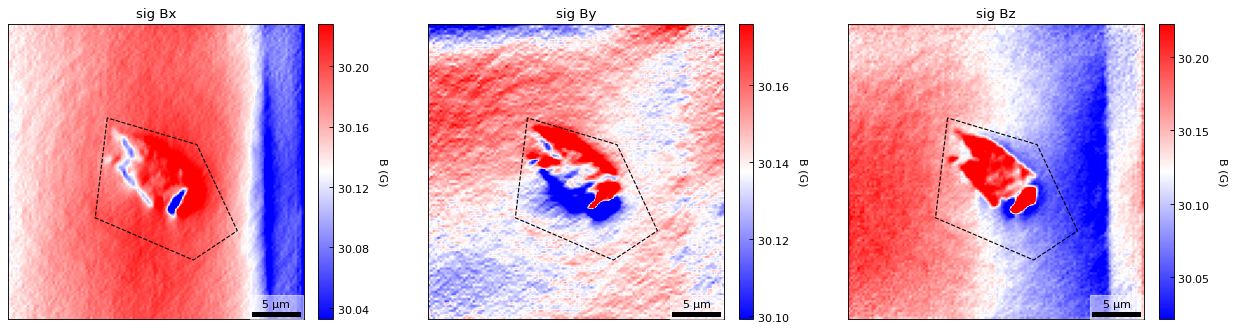

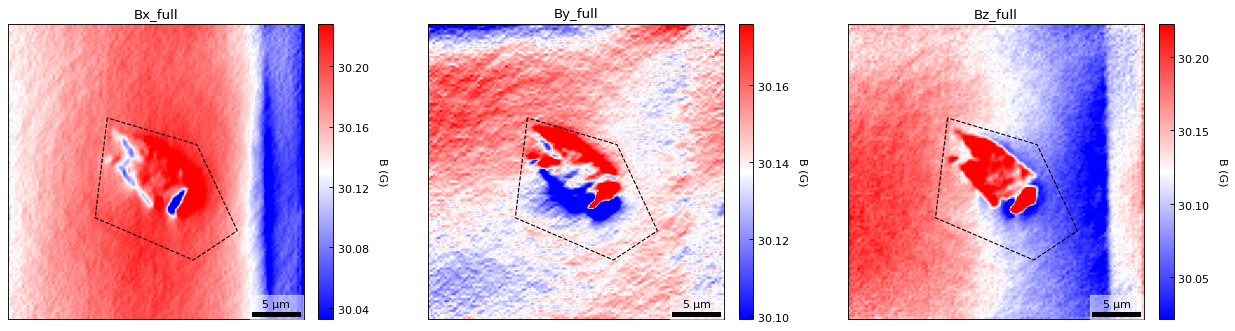

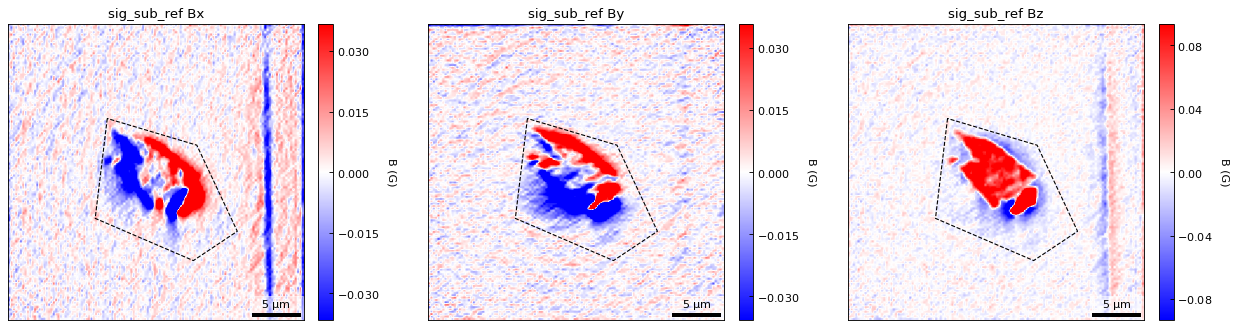

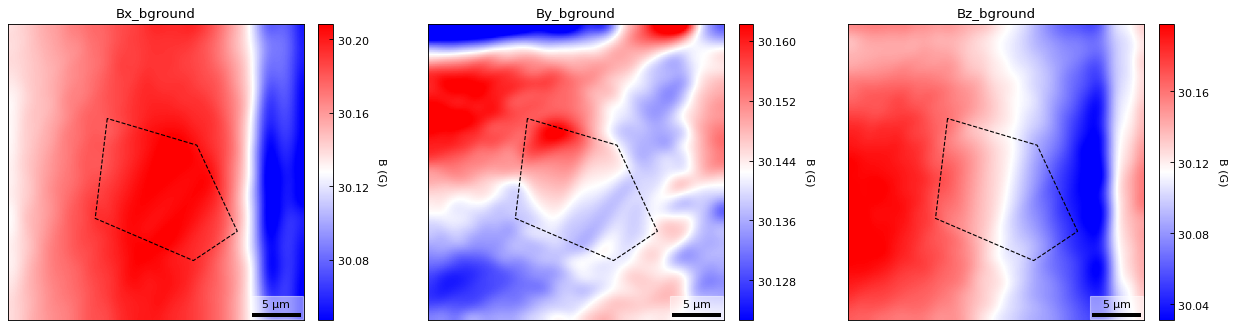

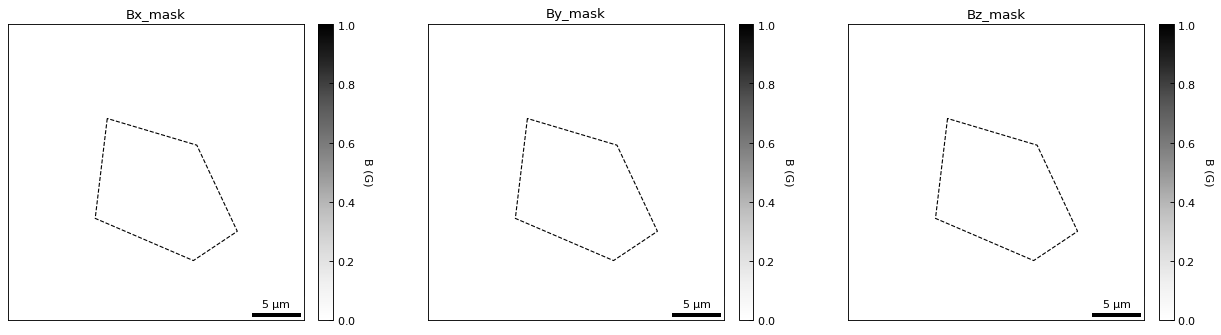

In [36]:
bfield_sig_plot = qdmpy.plot.bfield(options, "sig", sig_params)
bfield_ref_plot = qdmpy.plot.bfield(options, "ref", ref_params)
no_bsub_plot = qdmpy.plot.bfield(options, "full", field_params)
bfield_plot = qdmpy.plot.bfield(options, "sig_sub_ref", field_params)
bfield_bground_plot = qdmpy.plot.bfield(options, "bground", field_params)
bfield_bground_plot = qdmpy.plot.bfield(options, "mask", field_params)

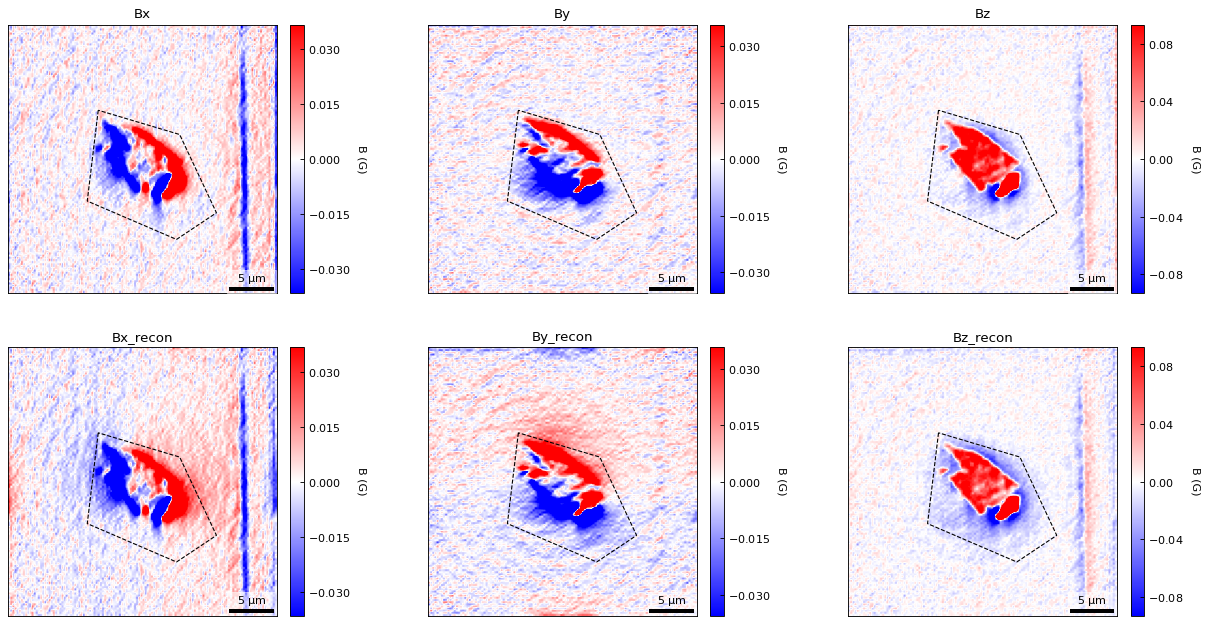

In [29]:
bconsist_plot = qdmpy.plot.bfield_consistency(options, "sig_sub_ref", field_params)

In [30]:
source_params = qdmpy.source.odmr_source_retrieval(options, bnvs, field_params)
qdmpy.source.save_source_params(options, source_params)

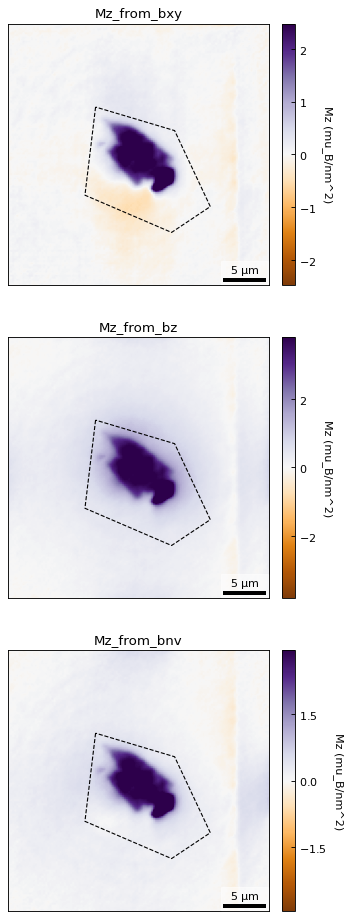

In [31]:
mag_plot = qdmpy.plot.magnetization(options, source_params, plot_bgrounds=True)

In [32]:
qdmpy.save_options(options)
# import qdmpy.shared.json2dict; print(qdmpy.shared.json2dict.dict_to_json_str(options))